# Phase 2, Experimentation with Semantic Domains

Semantic domain data is used courtesy of Renier de Blois and the United Bible Societies. A semantic domain contains nested, hierarchical labels for words in the Hebrew Bible such as:

> 0001001 beings - all living beings natural or supernatural

There are numerous levels of semantic data to choose from. We can implement this data for basis selection, to attempt to find more differentiations between verb classes. 

While the implementation of semantic domain data does not follow a strict form-to-function methodology, it is useful and interesting to see what the outcome of adding this data to the analysis will be. On the one hand, semantic domain data is hand-crafted and manually selected for fine-tuned semantic distinctions. On the other hand, these categories are legitimately interesting for verbal semantics. Classifying individual words is likely subject to less bias than classifying verb classes, due to the complexity of verbal arguments. Thus, this method at least follows the form-to-function methodology in an empirical way, i.e. using lower-level data to obtain empirically verifiable results for higher level data.

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c',
                 '~/github/semantics/project_code/sdbh']

TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st 
                sem_domain 
                sem_domain_code
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_semDomain', version='c')

from project_code.experiments2 import ExperimentFrame, Experiment
from project_code.semspace import SemSpace
from project_code.sem_params import vf_sd_so

This is Text-Fabric 4.1.2
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

118 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 4.1.2</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>

ModuleNotFoundError: No module named 'project_code.sem_params'

## Experiment

In [2]:
sde = Experiment(vf_sd_so, tf=tf_api)

In [3]:
sde.data.shape

(5, 459)

In [4]:
sde.data

,<BD[.qal,<BR[.hif,<BR[.qal,<CQ[.qal,<FH[.nif,<FH[.qal,<LH[.hif,<LH[.nif,<LH[.qal,<LZ[.qal,...,YWH[.piel,YWM[.qal,YWR[.qal,Z<Q[.qal,ZBX[.qal,ZKR[.qal,ZMR[.piel,ZNH[.qal,ZR<[.qal,ZRQ[.qal
Objc.animate,43.0,8.0,6,12.0,0.0,82,27,0.0,0.0,0.0,...,37.0,0.0,0.0,0.0,29.0,9,2.0,1.0,0.0,18.0
Objc.inanimate,6.0,12.0,7,1.0,0.0,368,37,0.0,3.0,0.0,...,3.0,0.0,2.0,0.0,0.0,12,0.0,0.0,15.0,2.0
Subj.animate,10.0,2.0,25,1.0,4.0,122,8,4.0,61.0,2.0,...,37.0,0.0,0.0,2.0,1.0,7,0.0,1.0,0.0,2.0
Subj.inanimate,0.0,0.0,18,0.0,5.0,7,3,6.0,30.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1,0.0,0.0,0.0,0.0
ø,25.0,3.0,152,2.0,33.0,502,14,6.0,256.0,9.0,...,19.0,15.0,16.0,35.0,34.0,42,29.0,24.0,9.0,5.0


In [5]:
sds = SemSpace(sde)

  0.00s Applying association measure(s)...
   |     0.00s Applying PPMI...
   |     0.10s Finished PPMI...
  0.10s Building pairwise matrices...
   |     0.00s Building pairwise distances...
   |     0.02s Building pairwise similarities...
  0.34s space is ready!


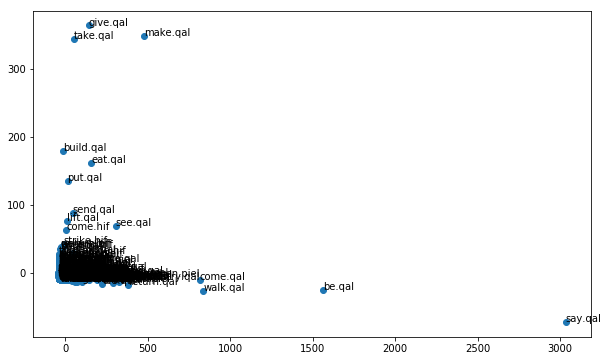

In [6]:
sds.raw_plot.show()

In [8]:
freq_sorted = sds.raw.sum().sort_values(ascending=False).head(200)

In [10]:
for lex in freq_sorted.index[:10]:
    key = f'{lex} ({sde.target2gloss[lex]})'
    print(sds.similarity_raw[key].sort_values(ascending=False).head(10))
    print()

>MR[.qal (say)                1.000000
RKB[.qal (ride)               0.999987
XML[.qal (have compassion)    0.999959
M>N[.piel (refuse)            0.999948
XJH[.qal (be alive)           0.999930
XZQ[.hit (be strong)          0.999910
M<L[.qal (be unfaithful)      0.999826
XMM[.qal (be hot)             0.999826
C<H[.qal (look)               0.999826
CRQ[.qal (whistle)            0.999826
Name: >MR[.qal (say), dtype: float64

HJH[.qal (be)         1.000000
GJL[.qal (rejoice)    0.999330
XLL[.hif (defile)     0.998869
<FH[.nif (make)       0.998667
GBH[.qal (be high)    0.998016
DMH[.qal (be like)    0.998016
SWG[.nif (turn)       0.998016
HPK[.nif (turn)       0.997753
CBT[.qal (cease)      0.997753
RBH[.qal (be many)    0.997553
Name: HJH[.qal (be), dtype: float64

BW>[.qal (come)               1.000000
QWM[.qal (arise)              0.999926
XZQ[.qal (be strong)          0.999807
QRB[.qal (approach)           0.999219
NG<[.hif (touch)              0.999206
FMX[.qal (rejoice)            

### Clustering

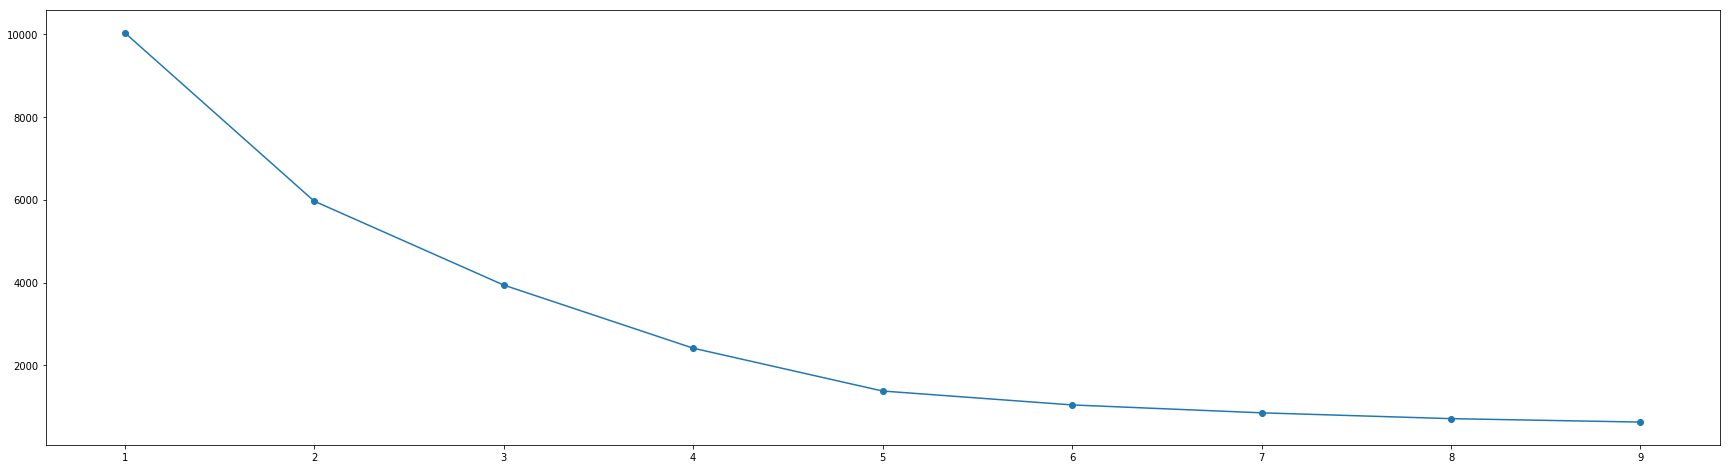

In [24]:
test = sds.similarity_pmi

k_to_squared = []
k_range = range(1, 10, 1)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(np.nan_to_num(test, 0))
    k_to_squared.append((k, kmeans.inertia_))
    
x = [ks[0] for ks in sorted(k_to_squared)]
y = [ks[1] for ks in sorted(k_to_squared)]
   
plt.figure(figsize=(30, 8))
ax = plt.axes()
ax.set_xticks(tuple(k_range))
plt.plot(x, y)
plt.scatter(x, y)

In [25]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(np.nan_to_num(test, 0))

cglossed = pd.DataFrame(kmeans.labels_, 
                        index=[f'{F.lex.v(sde.target2lex[w])}.{F.vs.v(sde.target2node[w])} -- {sde.target2gloss[w]}' for w in sds.raw.columns], 
                        columns=['cluster']).fillna(0)

clustmin = pd.DataFrame(kmeans.labels_, 
                        index=sds.raw.columns, 
                        columns=['cluster']).fillna(0)

gloss_to_lex = dict(zip(cglossed.index, clustmin.index))

In [26]:
clustmin.cluster.value_counts()

1    234
3     68
0     54
2     52
4     51
Name: cluster, dtype: int64

In [27]:
sorted_cluster_names = cglossed.cluster.unique()
sorted_cluster_names.sort()

for cname in sorted_cluster_names:
    
    cluster = cglossed[cglossed.cluster == cname]
    lexs = [lex.split()[0] for lex in cluster.index]
    
    
    print(f'CLUSTER {cname}')
    print(cluster.shape)
    print()
    print('TOP ARGUMENTS:')
    print(sds.raw[lexs].sum(axis=1).sort_values(ascending=False).head(10))
    print()
    print(cluster.head(15))
    print()
    print('-'*40)

CLUSTER 0
(54, 1)

TOP ARGUMENTS:
Objc.inanimate    2057.0
ø                 1456.0
Objc.animate       627.0
Subj.animate       389.0
Subj.inanimate      51.0
dtype: float64

                      cluster
<BR[.hif -- pass            0
<FH[.qal -- make            0
<LH[.hif -- ascend          0
<MD[.hif -- stand           0
<RK[.qal -- arrange         0
<WR[.hif -- be awake        0
>KL[.qal -- eat             0
BNH[.qal -- build           0
CBR[.piel -- break          0
CBR[.qal -- break           0
CLK[.hif -- throw           0
CMR[.qal -- keep            0
CQL[.qal -- weigh           0
CTH[.qal -- drink           0
CXT[.hif -- destroy         0

----------------------------------------
CLUSTER 1
(234, 1)

TOP ARGUMENTS:
ø                 3265.0
Subj.animate       421.0
Objc.inanimate     243.0
Objc.animate       232.0
Subj.inanimate      71.0
dtype: float64

                              cluster
<LZ[.qal -- rejoice                 1
<WD[.hif -- warn, to witness        1
<WP[.qal -- f